### IRIS data

We start by collecting the data from 'IRIS.csv' and getting an overview from it. 

In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('IRIS.csv')

df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We now want to see if there is any correlation between sepal and petal dimensions, so we create the following two plots. 

<Axes: xlabel='sepal_width', ylabel='petal_width'>

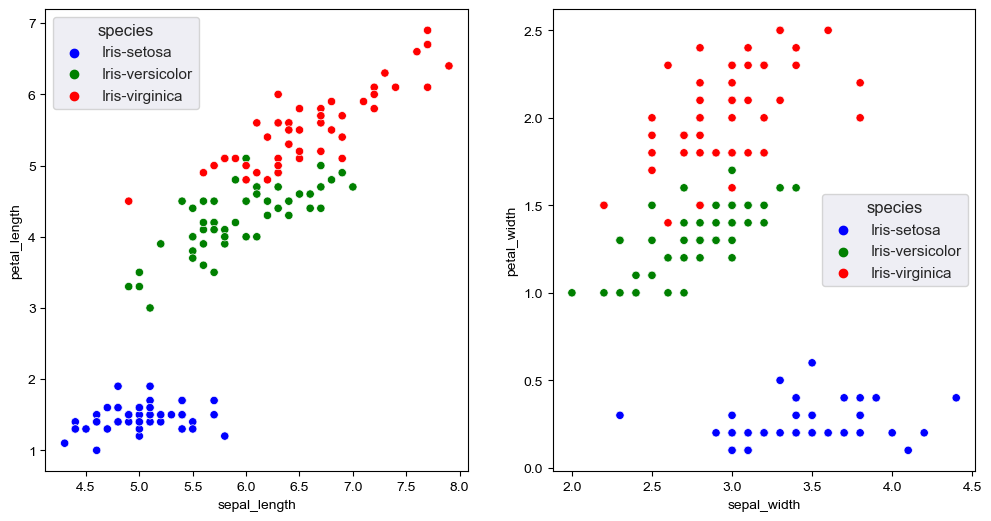

In [368]:
fig1, ax1 = plt.subplots(1,2, figsize=(12,6)) 

my_palette={'Iris-setosa':'blue', 'Iris-versicolor':'green', 'Iris-virginica':'red'}

sns.set(style="darkgrid")
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df1, palette=my_palette, ax=ax1[0])
sns.scatterplot(x='sepal_width', y='petal_width', hue='species', data=df1, palette=my_palette, ax=ax1[1])


We can see some correlation between sepal and petal dimensions, and the correlation is more obvious for Iris-virginica, and for length, while it is less obvious for width, and does not really exist for Iris-setosa. 

We now want to get an overlook of the distribution of the dimensions, so we create the following boxplots. 

<Axes: xlabel='species', ylabel='petal_length'>

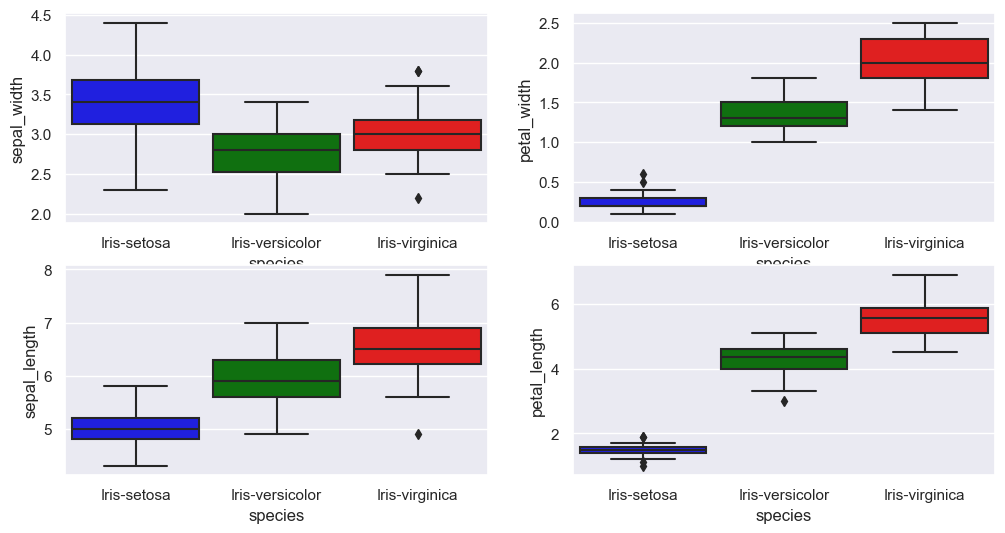

In [10]:
fig2, ax2 = plt.subplots(2,2, figsize=(12,6))

sns.boxplot(x='species',y='sepal_width', data=df1, palette=my_palette, ax=ax2[0,0], width=0.9)
sns.boxplot(x='species',y='sepal_length', data=df1, palette=my_palette, ax=ax2[1,0], width=0.9)
sns.boxplot(x='species',y='petal_width', data=df1, palette=my_palette, ax=ax2[0,1], width=0.9)
sns.boxplot(x='species',y='petal_length', data=df1, palette=my_palette, ax=ax2[1,1], width=0.9)

We can see that the distribution of petal length and width for Iris-setosa is distributed in a very narrow interval compared to the rest, with some outliers, while Iris-versicolor overall have dimensions with the fewest outliers. Overall so does sepal length and width seem to be distributed over a wider interval than petal length and width. 

We also want to create a pairplot over the data to get a good overview over eventual correlations. 

/Users/macbookpro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


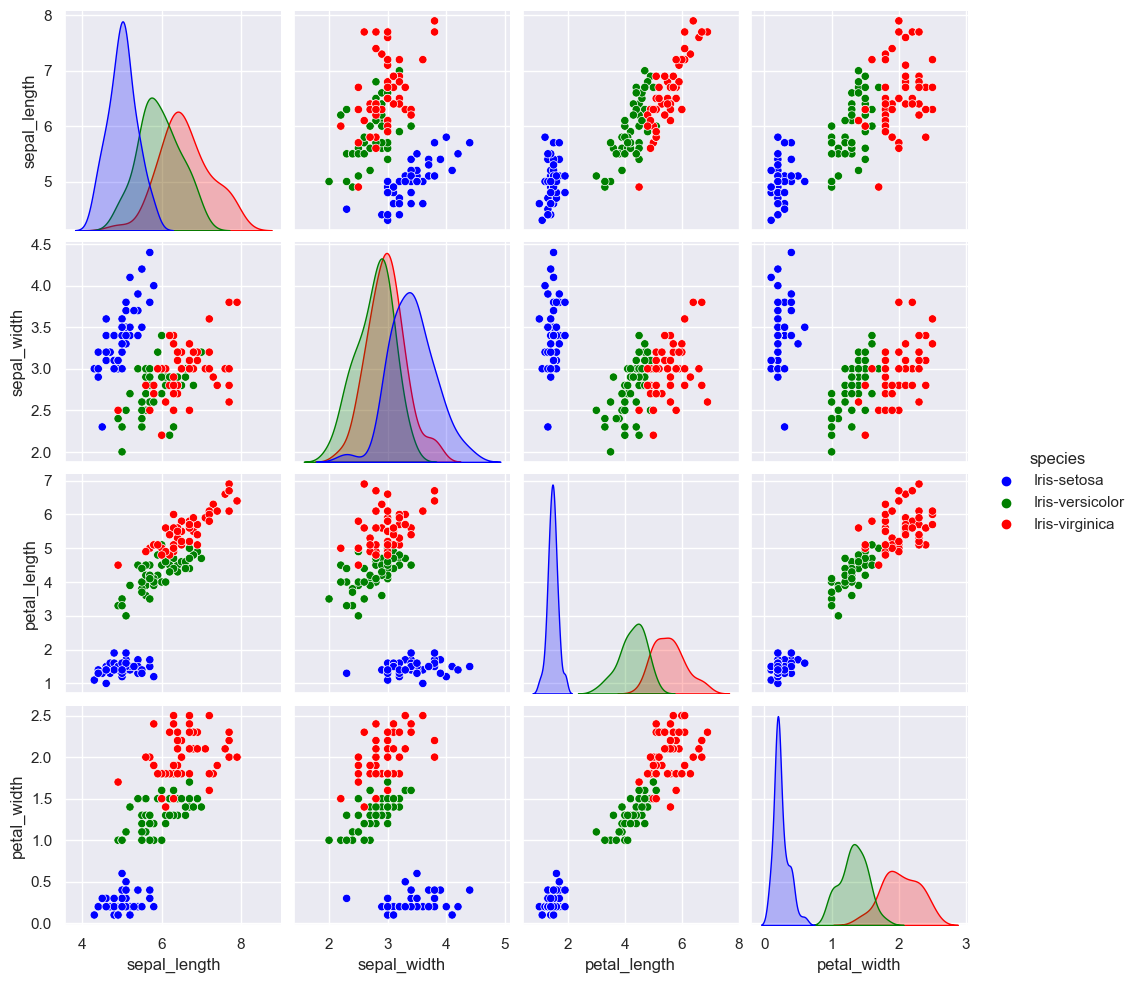

In [369]:
sns.pairplot(df1, hue='species', palette=my_palette)

We can in the pairplot see that the strongest correlation seems to be between petal_width and petal_length while both petal_width and sepal_length, and petal_length and sepal_width don't really have any correlation. 

### Birdwatching

We will now look on data from Artportalen, so we start by collecting the data from 'artportalen.csv' and getting an overview over it. 

In [317]:
df2 = pd.read_csv('artportalen.csv')
df2.head()

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,Aktivitet,...,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
0,97785066,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",2,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
1,97785067,54989,NaN,Blåmes,Cyanistes caeruleus,"(Linnaeus, 1758)",2,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
2,97785310,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",1,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
3,97786982,54735,NaN,Sparvhök,Accipiter nisus,"(Linnaeus, 1758)",1,NaN,hona,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
4,97786985,54944,NaN,Skata,Pica pica,"(Linnaeus, 1758)",2,NaN,NaN,NaN,...,Uppland,Solna,2021-12-30,15:57,2022-01-01,09:36,NaN,NaN,Henrik Spovin,Henrik Spovin


We first want to answer the question 'what are the most prevelant species?', and we can here below see the three most prevelant species. 

In [318]:
df2['Antal']=pd.to_numeric(df2['Antal'], errors='coerce')

df2=df2.dropna(subset=['Antal'])

three_most_prevelant = df2.groupby('Artnamn')['Antal'].sum().sort_values(ascending=False).head(3)
three_most_prevelant

Artnamn
Grönsiska    20211.0
Sothöna       8308.0
Gräsand       7167.0
Name: Antal, dtype: float64

We now want to answer the question 'what is the monthly distribution of the top 3 most prevelant species?', and we can see the answer of this below, where month 1 is January 2022 and month 6 is June 2022. 

In [320]:
df3=df2[df2['Artnamn'].isin(three_most_prevelant.index)].copy()

df3['Månad']=pd.to_datetime(df3['Startdatum'],errors='coerce').dt.month

df3.groupby(['Artnamn', 'Månad'])['Antal'].sum()

Artnamn    Månad
Gräsand    1         2953.0
           2         1583.0
           3         1152.0
           4          858.0
           5          515.0
           6          106.0
Grönsiska  1        19507.0
           2          648.0
           3           33.0
           4            6.0
           5           10.0
           6            7.0
Sothöna    1         2142.0
           2         2100.0
           3         3052.0
           4          614.0
           5          288.0
           6          112.0
Name: Antal, dtype: float64

Now we want to find the rarest species, and we can downbelow find the species which only one have been seen of. 

In [319]:
species_freq=df2.groupby('Artnamn')['Antal'].sum()
rarest = species_freq[species_freq==1]
print(rarest)

Artnamn
Bivråk                       1.0
Bändelkorsnäbb               1.0
Ejder                        1.0
Fjällvråk                    1.0
Forsärla                     1.0
Gravand                      1.0
Lappsparv                    1.0
Ormvråk, underarten buteo    1.0
Rosenfink                    1.0
Röd glada                    1.0
Rödbena                      1.0
Spillkråka                   1.0
Storlom                      1.0
Strömstare                   1.0
Tornfalk                     1.0
Trädlärka                    1.0
Varfågel                     1.0
Vinterhämpling               1.0
Ägretthäger                  1.0
Name: Antal, dtype: float64


Now we want to see what the size of the most of one species in one observation was, and which species that was observed. We can see that the largest observations was very large, which might change the data quite a lot, especially when it comes to "Grönsiska", which was one of the top three most viewed birds. It is very possible that an extra zero could have been added by mistake when putting in the data, which makes the number of "Grönsiska" viewed very different. 

In [371]:
df2[['Artnamn','Antal']].sort_values('Antal',ascending=False).head()

,Artnamn,Antal
1111,Grönsiska,10000.0
430,Grönsiska,3000.0
966,Grönsiska,1100.0
606,Grönsiska,1000.0
243,Björktrast,600.0


We now want to view what percentage of the species from the data that is on the redlist. We can in the data below see that it is about a fourth of the species. This highlights an important fact, the endangerement of species, and also shows how many of the rows in the dataframe that does not have NaN. From the first look of the data so does this not show at all. 

In [291]:
df2 = pd.read_csv('artportalen.csv')

red_or_not=df2.groupby('Artnamn')['Rödlistade'].count()
endangered_species=red_or_not[red_or_not!=0]
percentage_endangered=endangered_species.size/red_or_not.size

print(percentage_endangered)

0.26011560693641617


We finally want to see which people that have made the most observations. We can see the top five below. This is an important aspect of the data since these people, and the way that they interpret they observations and write it into the database, will have an big impact on the data. If one of these people make a regular mistake so will that have a large impact, compared to if many different people make some mistake, since these people are indipendent of each other and therefore will probably not make the same mistakes. 

In [311]:
df2.groupby('Observatörer')['Observatörer'].count().sort_values(ascending=False).head()

Observatörer
Svante Söderholm    4542
Johan Nilsson       1628
Bill Martens         968
jesper sollerman     954
Magnus Edberg        692
Name: Observatörer, dtype: int64

### Predicting Strokes

We now want to explore data about strokecases. 

In [182]:
df4=pd.read_csv('stroke-data copy.csv')
df4.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We first see if we can see some correlation between stroke and bmi. We can in the histograms below not really see any correlation, but we can see that the amount of people who've had a stroke in the data is much less than the amount of people who haven't had a stroke.

<Axes: title={'center': 'Cases with no stroke'}, xlabel='bmi', ylabel='Count'>

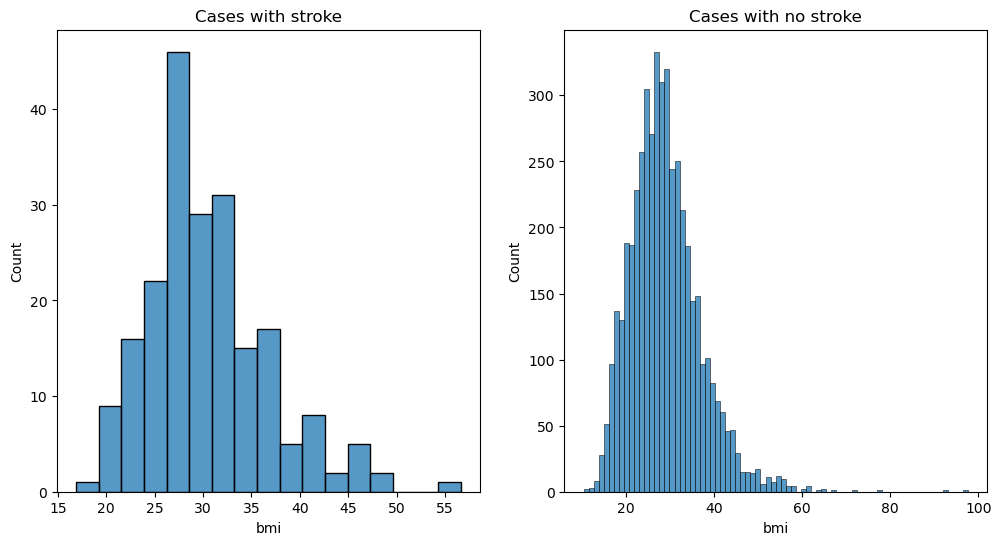

In [354]:
fig3, ax3 = plt.subplots(1,2, figsize=(12,6)) 

ax3[0].set_title('Cases with stroke')
ax3[1].set_title('Cases with no stroke')

data1=df4[df4['stroke']==1]
data2=df4[df4['stroke']==0]

sns.histplot(x='bmi', data=data1, ax=ax3[0])
sns.histplot(x='bmi', data=data2, ax=ax3[1])

We now want to investigate if there is a correlation between gender and stroke. We can in the data below not really see a difference in ratio between men and women for people who've had a stroke between people who haven't had a stroke. We can also see that there is more women than men in the data, which is an important fact about the data. 

In [363]:
df4.groupby(['stroke','gender'])['gender'].count()

stroke  gender
0       Female    2853
        Male      2007
        Other        1
1       Female     141
        Male       108
Name: gender, dtype: int64

We finally want to investigate the same thing but instead of gender we want to investigate Residance_type. Here can we actually see a correlation, where people from Urban areas seem to get strokes somewhat more often than people from rural areas. We can here see another important fact about the data which is that there seems to be almost exactly the same amount of people from urban and rural areas. 

In [365]:
df4.groupby(['stroke','Residence_type'])['Residence_type'].count()

stroke  Residence_type
0       Rural             2400
        Urban             2461
1       Rural              114
        Urban              135
Name: Residence_type, dtype: int64

### Cleaning data

We now want to make the data in the file 'cell_phones_total.csv' into number and fill in NaN values. 

In [262]:
df5=pd.read_csv('cell_phones_total.csv')
df5

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,132k,NaN,135k,139k,140k,141k,NaN,NaN,NaN,NaN
1,AFG,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,AGO,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,ALB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,AND,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,562k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,YEM,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,11.1M,11.7M,13.9M,16.8M,17.1M,15M,16.4M,15.4M,15.3M,NaN
211,ZAF,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,50.4M,64M,68.4M,76.9M,79.3M,88M,82.4M,88.5M,92.4M,97M
212,ZMB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,5.45M,8.16M,10.5M,10.4M,10.1M,11.6M,12M,13.4M,15.5M,17.2M


We start by filling in the data in 1960 with just zeroes, since there seem to be just zeroes until 1970 atleast. 

In [263]:
df5.loc[:,'1960']=df5['1960'].fillna(0)
df5

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,132k,NaN,135k,139k,140k,141k,NaN,NaN,NaN,NaN
1,AFG,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,AGO,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,ALB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,AND,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,562k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,YEM,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,11.1M,11.7M,13.9M,16.8M,17.1M,15M,16.4M,15.4M,15.3M,NaN
211,ZAF,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,50.4M,64M,68.4M,76.9M,79.3M,88M,82.4M,88.5M,92.4M,97M
212,ZMB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,5.45M,8.16M,10.5M,10.4M,10.1M,11.6M,12M,13.4M,15.5M,17.2M


We now fill in the cells with NaN with the data closest from the left. 

In [264]:
df5=df5.fillna(method='ffill', axis=1)
df5

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132k,132k,135k,139k,140k,141k,141k,141k,141k,141k
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,562k,562k,562k,562k,562k,562k,562k,562k,562k,562k
210,YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.1M,11.7M,13.9M,16.8M,17.1M,15M,16.4M,15.4M,15.3M,15.3M
211,ZAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.4M,64M,68.4M,76.9M,79.3M,88M,82.4M,88.5M,92.4M,97M
212,ZMB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.45M,8.16M,10.5M,10.4M,10.1M,11.6M,12M,13.4M,15.5M,17.2M


We finally represent the data in the table below sorted after 2015. 

In [265]:
for column in [col for col in df5.columns if col != 'iso-3']:
    for index in df5.index:
        try:
            df5.loc[index,column]=df5.loc[index, column].replace('k','e3')
            df5.loc[index,column]=df5.loc[index, column].replace('M','e6')
            df5.loc[index,column]=df5.loc[index, column].replace('B','e9')
        except AttributeError:
            continue     
    df5[column]=pd.to_numeric(df5[column], errors='coerce')

df5.loc[:,['iso-3','2015','2016','2017','2018','2019']].sort_values('2015', ascending=False).head()

,iso-3,2015,2016,2017,2018,2019
35,CHN,1.290000e+09,1.360000e+09,1.470000e+09,1.650000e+09,1.730000e+09
87,IND,1.000000e+09,1.130000e+09,1.170000e+09,1.180000e+09,1.150000e+09
200,USA,3.820000e+08,3.960000e+08,4.000000e+08,4.220000e+08,4.220000e+08
86,IDN,3.390000e+08,3.860000e+08,4.350000e+08,3.190000e+08,3.450000e+08
26,BRA,2.580000e+08,2.440000e+08,2.180000e+08,2.070000e+08,2.070000e+08
